In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
#Importing the dataset

In [71]:
dataset=pd.read_csv("Credit_Card_Applications.csv")

In [72]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [73]:
!pip install MiniSom

In [74]:
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [75]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [76]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [77]:
from minisom import MiniSom

In [78]:
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

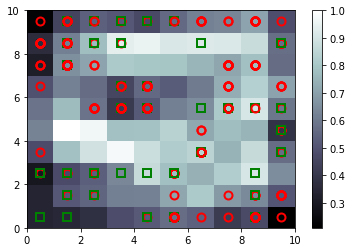

In [79]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 8,
         markeredgewidth = 2)
show()

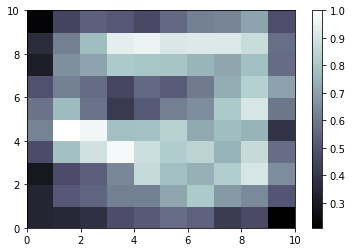

In [80]:
bone()
pcolor(som.distance_map().T)
colorbar()

In [90]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [91]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15768295
15762799
15747757
15716347
15593694


In [92]:
customers = dataset.iloc[:, 1:].values

In [93]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [95]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [96]:
ann = tf.keras.models.Sequential()

In [97]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

In [98]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [99]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [100]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 2ms/step - loss: 0.2675 - accuracy: 0.9928
Epoch 2/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1291 - accuracy: 0.9928
Epoch 3/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0806 - accuracy: 0.9928
Epoch 4/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0594 - accuracy: 0.9928
Epoch 5/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0483 - accuracy: 0.9928
Epoch 6/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0413 - accuracy: 0.9928
Epoch 7/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0361 - accuracy: 0.9928
Epoch 8/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0319 - accuracy: 0.9928
Epoch 9/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0294 - accuracy: 0.9928
Epoch 10/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0277 - accuracy: 0.9928

In [101]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [102]:
print(y_pred)

[[1.56214230e+07 3.89799881e-09]
 [1.57997850e+07 7.89590672e-07]
 [1.57206440e+07 8.06581170e-07]
 ...
 [1.57163470e+07 2.25111365e-01]
 [1.57901130e+07 2.43995130e-01]
 [1.57477570e+07 2.43995130e-01]]
